<div >
    <center> <font size=7 color=red><b>image classification </b></font>
    </center>
    <br>
    
</div>


#**Linear neural network for image classification with no activation & no convolution.**


# **Step 1 : Load The CSV file, read the images, and Create a Tensorflow dataset**

In [ ]:
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
def read_and_decode(filename, resize_dims):
  #1. Read the raw file
  img_bytes = tf.io.read_file(filename)
  #2. Decode image data
  img = tf.image.decode_jpeg(img_bytes,channels = IMG_CHANNELS)
  #3. Convert pixel values to float in  [0,1]
  img = tf.image.convert_image_dtype(img,tf.float32)
  #4. Resizen the image to match desired dimentions
  img = tf.image.resize(img,resize_dims)
  return img

In [14]:
def parse_csvline(csv_line):
  #record_defaults specify the data types for each column
  record_default = ["",""]
  filename,label_string = tf.io.decode_csv(csv_line, record_default)

  #Load the imege
  img = read_and_decode(filename,[IMG_HEIGHT,IMG_WIDTH])

  #Convert label string to integer based on the CLASS_NAMES index
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img ,label

In [16]:
# Define datasets
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
  )

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

# **Step 2 : Create a batch dataset of images**

In [17]:
for image_batch , label_batch in train_dataset.take(1):
  print("Image batch shape :", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print("Labels:" ,label_batch.numpy())

Image batch shape : (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]


# **Step 3 : Visualize a single image example**

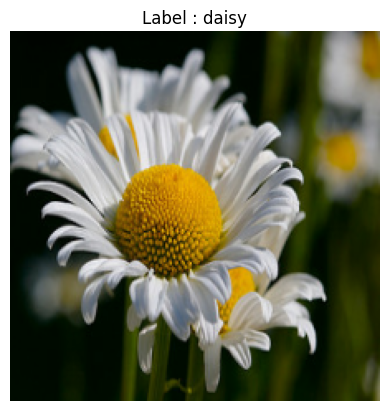

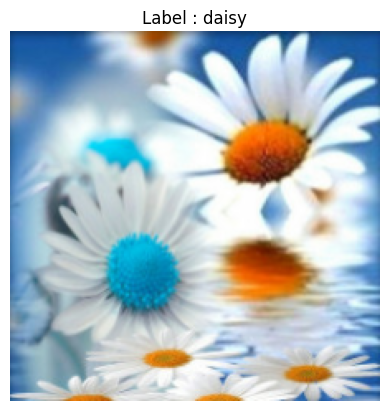

In [21]:
import matplotlib.pyplot as plt

for image_batch,label_batch in train_dataset.take(2):
  #Take the first image from the batch
  first_image = image_batch[0]
  first_label = label_batch[0]

  # Convert tensor to numpy array
  plt.imshow(first_image.numpy())
  plt.title(f"Label : {CLASS_NAMES[first_label]}")
  plt.axis('off')
  plt.show()


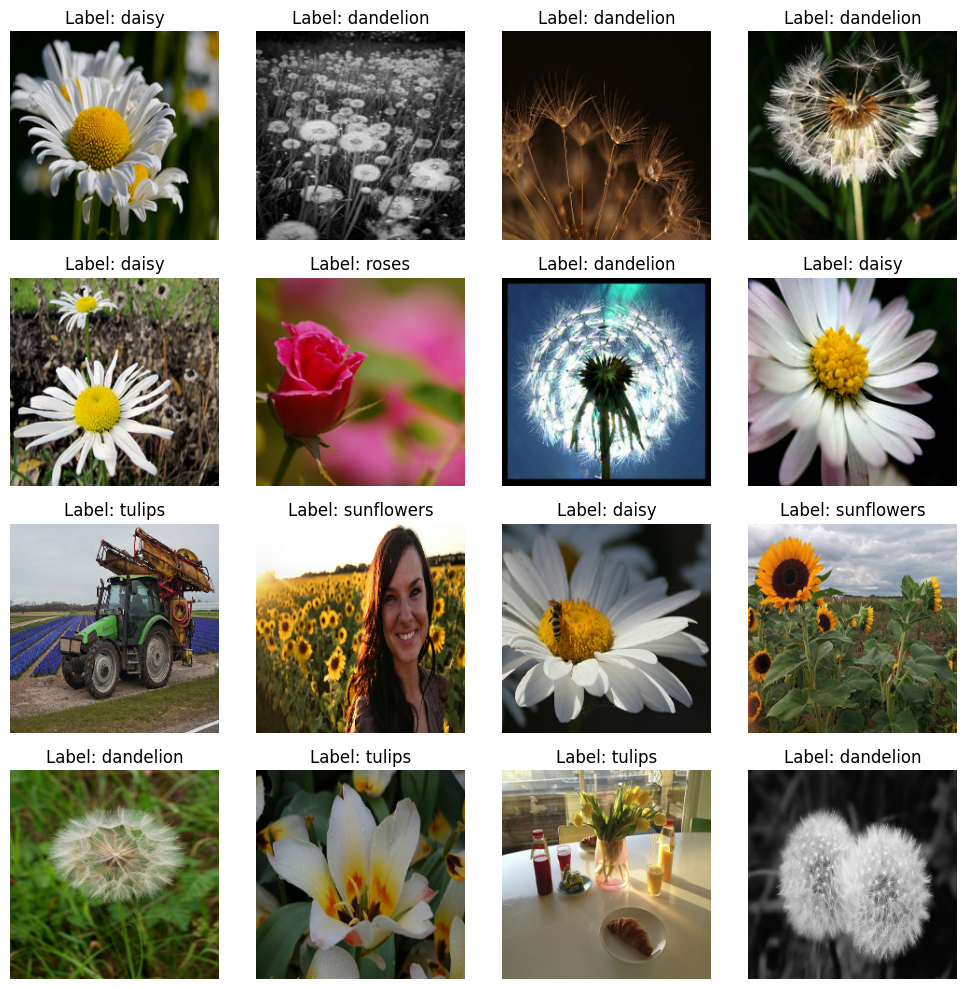

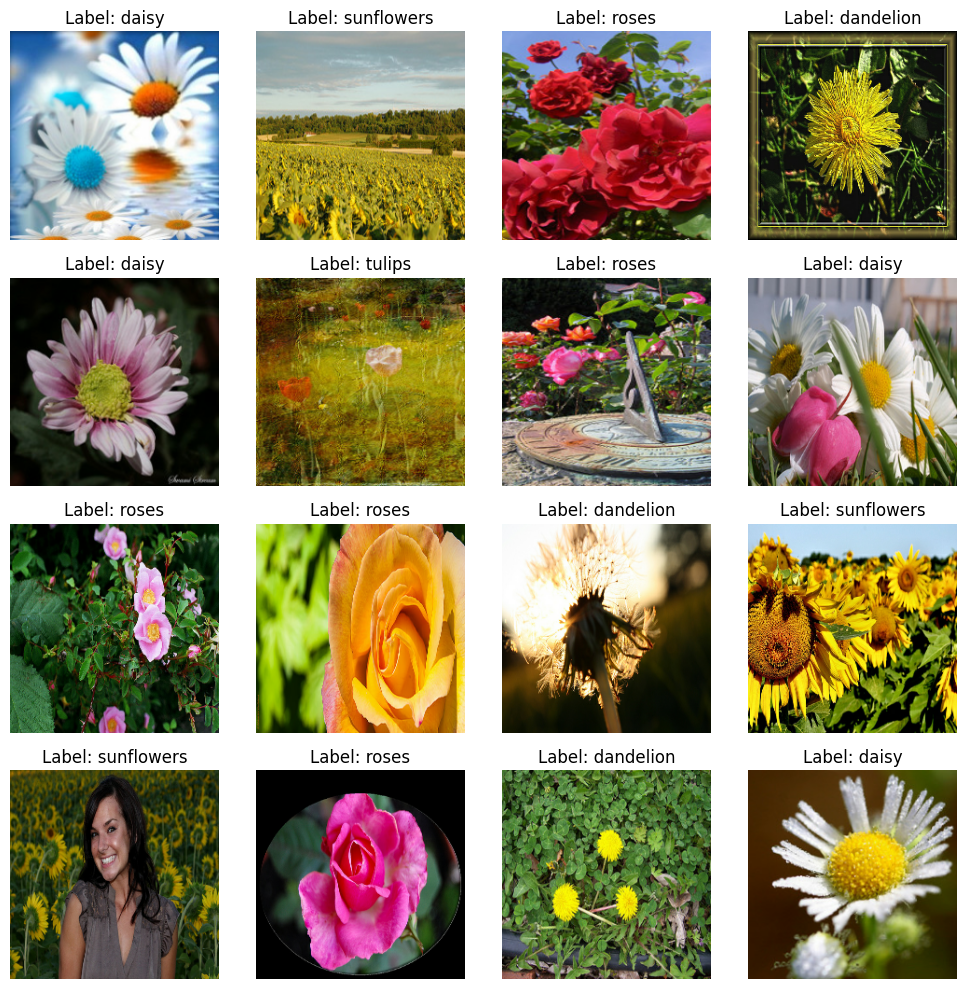

In [22]:
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in train_dataset.take(2):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Create a 4x4 grid

    for i in range(16):  # Loop over the first 16 images
        ax = axes[i // 4, i % 4]  # Determine grid position
        ax.imshow(image_batch[i].numpy())  # Convert tensor to numpy array
        ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
        ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()


# **Step 4 : Linear neural network for image classification**

# We will do 3 operations  in our linear neural network


#1.   Flattening
#2.   Dense fully connected
#3.   Softmax





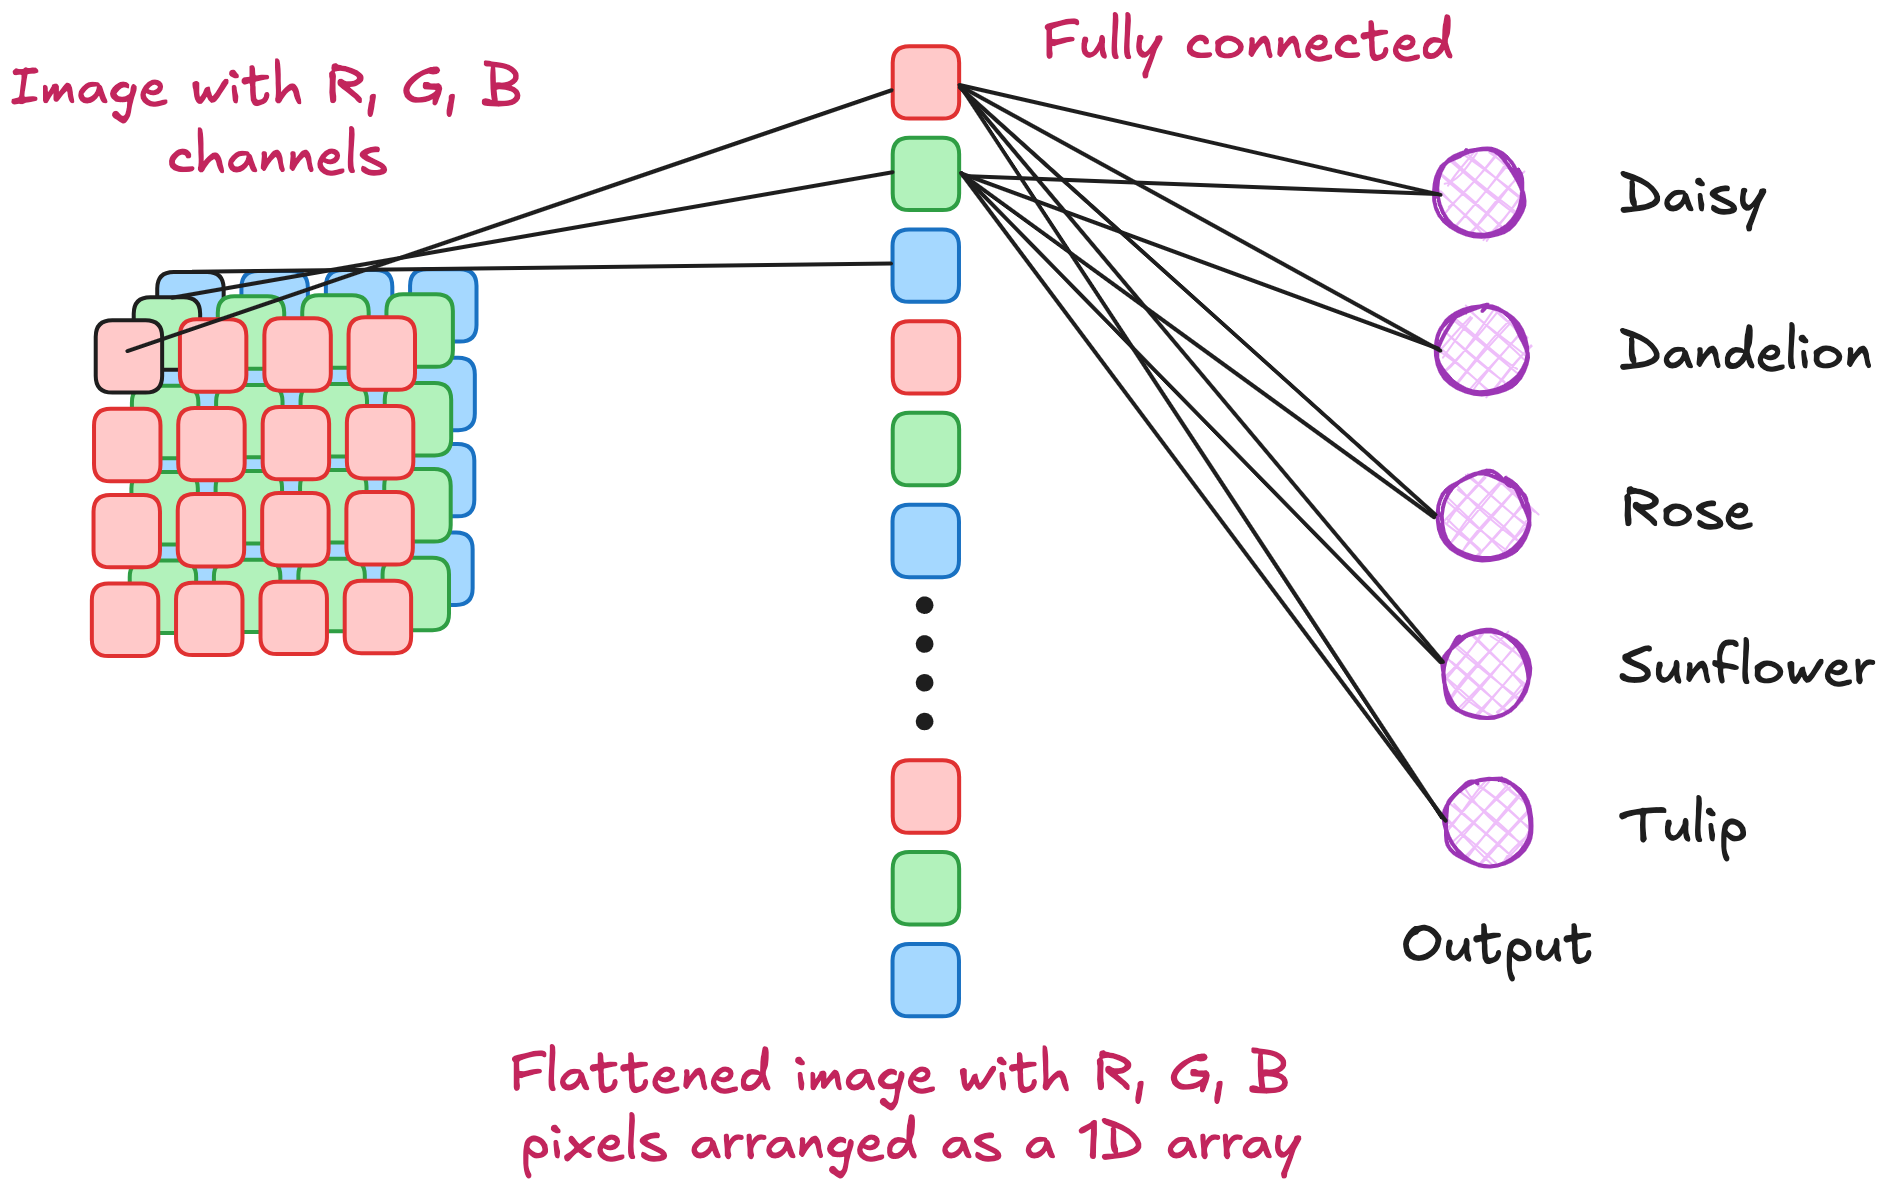

In [28]:
from IPython.display import Image, display

# Replace with your filename
display(Image("image.png" ,width=1000, height=500))


# **Defining a linear model using Keras**

In [30]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (IMG_HEIGHT,IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(len(CLASS_NAMES),activation="softmax")
                          ])

model.compile(
    optimizer = "adam",
    loss= keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Training the linear model.**

In [31]:
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data = eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 213s 1s/step - accuracy: 0.2901 - loss: 22.9904

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.2903 - loss: 22.9534 - val_accuracy: 0.3243 - val_loss: 14.1738
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 193s 930ms/step - accuracy: 0.4040 - loss: 11.8908 - val_accuracy: 0.4270 - val_loss: 5.6784
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 127s 614ms/step - accuracy: 0.4520 - loss: 8.7200 - val_accuracy: 0.3486 - val_loss: 17.8851
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 118s 568ms/step - accuracy: 0.4502 - loss: 10.5465 - val_accuracy: 0.3000 - val_loss: 21.2671
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 140s 678ms/step - accuracy: 0.4654 - loss: 12.6456 - val_accuracy: 0.3676 - val_loss: 16.8029
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 145s 700ms/step - accuracy: 0.5212 - loss: 9.5156 - val_accuracy: 0.3324 - val_loss: 20.5107
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 177s 857ms/step - accuracy: 0.5299 - loss: 10.2391 - val_accuracy: 0.4378 - val_loss: 12.6321
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 148s 595ms/step - accuracy: 0.5490 - lo

# **Step 5 : Visualizing the training and validation losses**

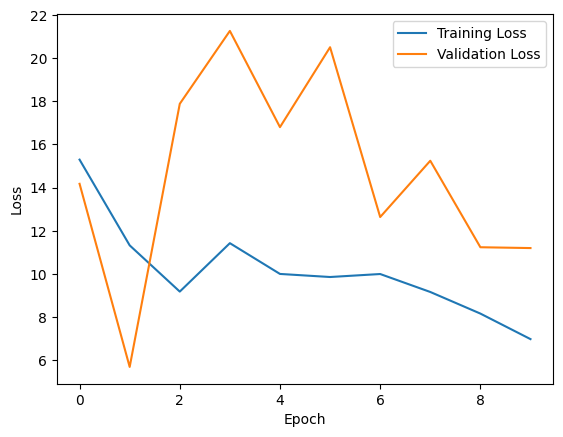

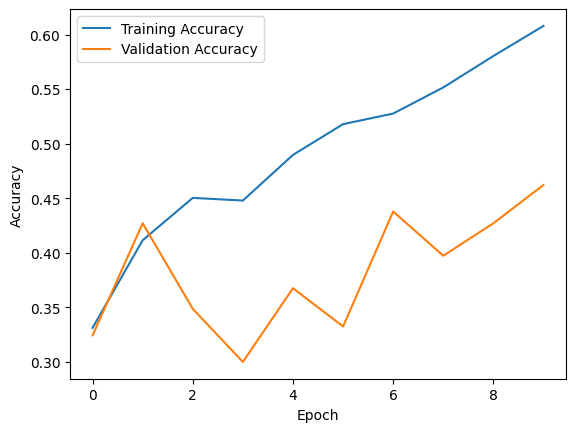

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Step 6 : Making Predictions on some sample validation data.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


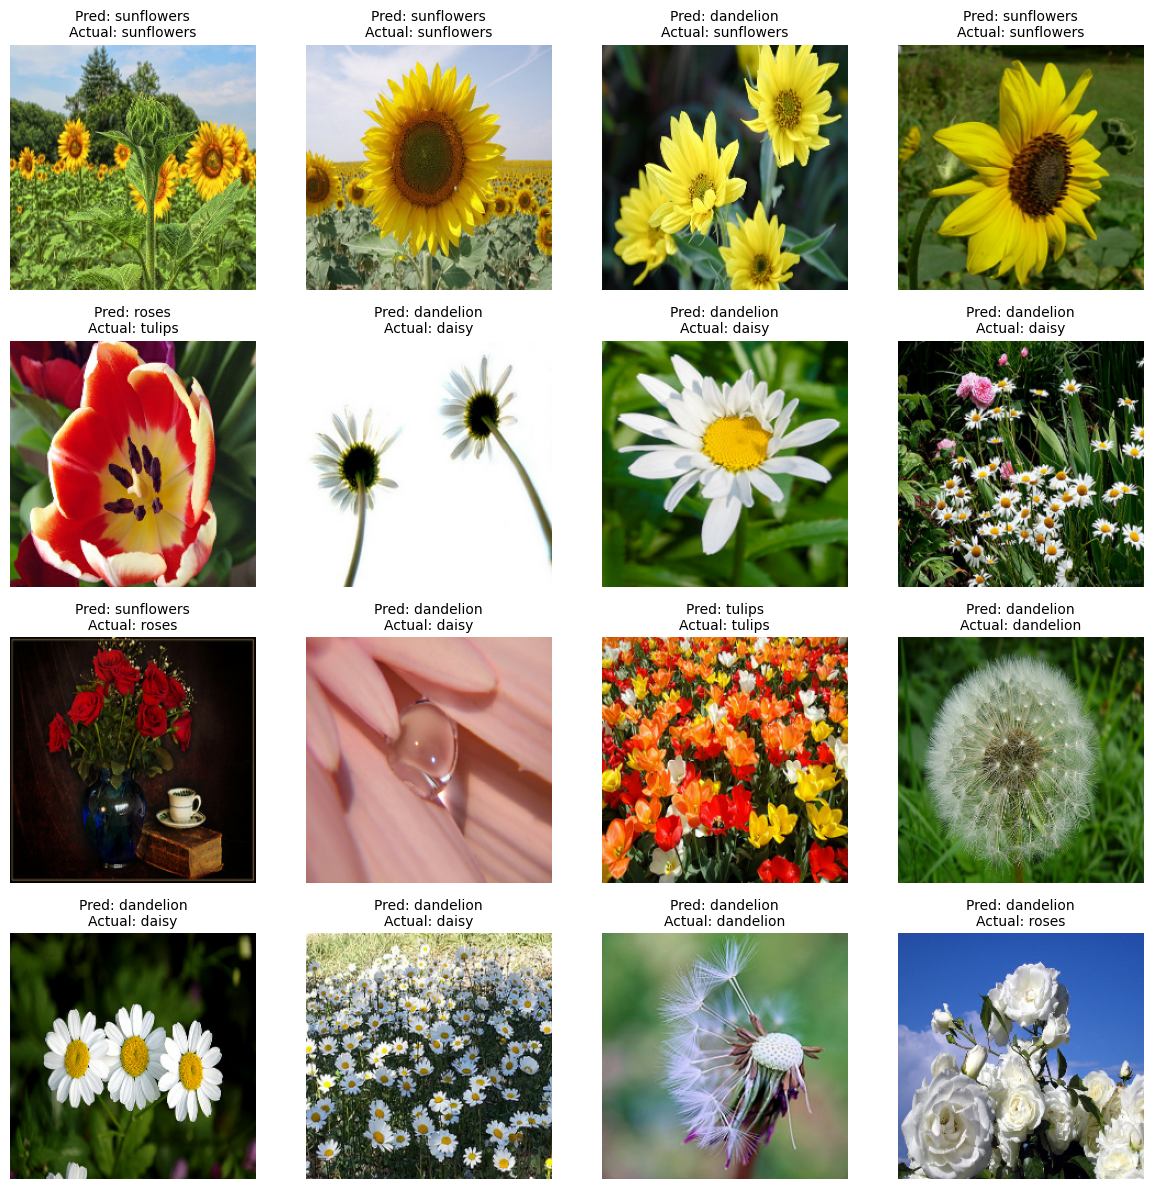

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Take exactly one batch from the evaluation dataset
for images, labels in eval_dataset.take(1):
    # Get model predictions for this batch
    batch_predictions = model.predict(images)
    predicted_indices = np.argmax(batch_predictions, axis=1)

    # Number of images in this batch
    num_images = images.shape[0]

    # Configure how many images to display per row
    num_cols = 4
    num_rows = math.ceil(num_images / num_cols)

    # Create a figure with a suitable size
    plt.figure(figsize=(12, 3 * num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)

        # Display the image
        plt.imshow(images[i].numpy())
        plt.axis('off')

        # Get predicted and actual class names
        pred_class = CLASS_NAMES[predicted_indices[i]]
        actual_class = CLASS_NAMES[labels[i].numpy()]

        # Show both predicted and actual labels as title
        plt.title(f"Pred: {pred_class}\nActual: {actual_class}", fontsize=10)

    # Adjust spacing to avoid overlapping titles, etc.
    plt.tight_layout()
    plt.show()

***Our validation acuracy is 40-50%*, this is bad because the model we used is purely linear model,will not capture intricate patterns. So what we can do to improve our model  accuracy ?**